In [1]:
from qiskit.transpiler import PassManager
from qiskit_ibm_transpiler.ai.routing import AIRouting
from qiskit.circuit.library import EfficientSU2

## Let's get the ibm_fez coupling map 

In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService

backend = QiskitRuntimeService().backend("ibm_fez")
fez_coupling_map = backend.coupling_map

## Create a circuit

Original circuit -> Depth: 104, Gates(2q): 100


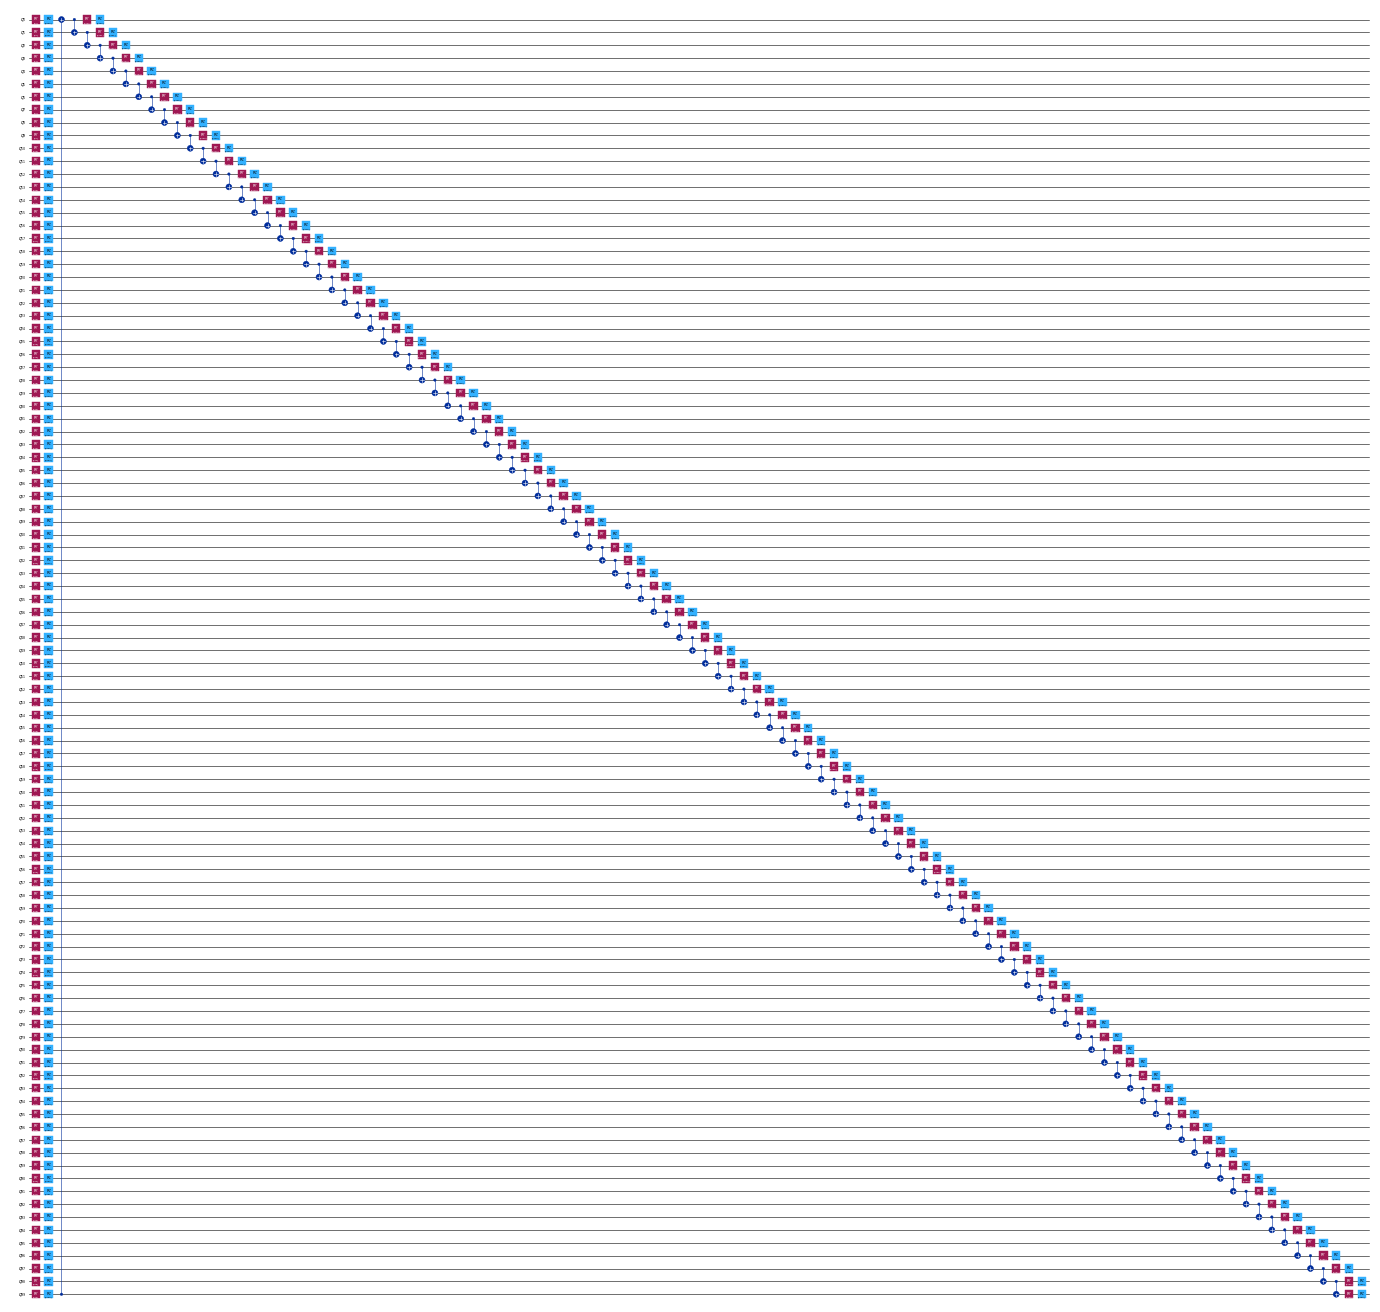

In [3]:
circuit = EfficientSU2(100, entanglement="circular", reps=1).decompose()
print(
    f"Original circuit -> Depth: {circuit.depth()}, Gates(2q): {circuit.num_nonlocal_gates()}"
)
circuit.draw(output="mpl", fold=-1, scale=0.2, style="iqp")

## Optimize the circuit

In [4]:
ai_transpiler = PassManager(
    [
        AIRouting(
            coupling_map=fez_coupling_map, optimization_level=1, layout_mode="optimize"
        )
    ]
)

ai_transpiled_circuit = ai_transpiler.run(circuit)

AttributeError: 'list' object has no attribute 'distance_matrix'

In [ ]:
print(
    f"Qiskit AI Transpiler -> Depth: {ai_transpiled_circuit.depth()}, Gates(2q): {ai_transpiled_circuit.num_nonlocal_gates()}"
)
ai_transpiled_circuit.draw(output="mpl", fold=-1, scale=0.2, style="iqp")